# **Rayan International AI Contest**

<font color='white' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course</strong></font>

<font color='white' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Title**: Pytorch workshop || **Part**: 1</em></font>
<br><br>
<font color='white' size=1>Copyright 2019. Created by Jose Marcial Portilla.</font>

 Perform standard imports

In [2]:
import torch
import numpy as np

In [3]:
torch.__version__

'2.3.1+cu121'

# Tensor Basics

A <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor</tt></strong></a> is a multi-dimensional matrix containing elements of a single data type.<br>
Calculations between tensors can only happen if the tensors share the same dtype.<br>

In [4]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.int)
print(x)
print(x.dtype)
print(x.type())

tensor([1, 2, 3, 4], dtype=torch.int32)
torch.int32
torch.IntTensor


In [5]:
x = torch.Tensor([1, 2, 3, 4])
print(x)
print(x.dtype)
print(x.type())

tensor([1., 2., 3., 4.])
torch.float32
torch.FloatTensor


<h2><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor Datatypes</a></h2>
<table style="display: inline-block">
<tr><th>TYPE</th><th>NAME</th><th>EQUIVALENT</th><th>TENSOR TYPE</th></tr>
<tr><td>32-bit integer (signed)</td><td>torch.int32</td><td>torch.int</td><td>IntTensor</td></tr>
<tr><td>64-bit integer (signed)</td><td>torch.int64</td><td>torch.long</td><td>LongTensor</td></tr>
<tr><td>16-bit integer (signed)</td><td>torch.int16</td><td>torch.short</td><td>ShortTensor</td></tr>
<tr><td>32-bit floating point</td><td>torch.float32</td><td>torch.float</td><td>FloatTensor</td></tr>
<tr><td>64-bit floating point</td><td>torch.float64</td><td>torch.double</td><td>DoubleTensor</td></tr>
<tr><td>16-bit floating point</td><td>torch.float16</td><td>torch.half</td><td>HalfTensor</td></tr>
<tr><td>8-bit integer (signed)</td><td>torch.int8</td><td></td><td>CharTensor</td></tr>
<tr><td>8-bit integer (unsigned)</td><td>torch.uint8</td><td></td><td>ByteTensor</td></tr></table>

In [ ]:
x = torch.tensor([1, -2, 3, 4], dtype=torch.uint16)
print(x)
print(x.dtype)
print(x.type())

tensor([    1, 65534,     3,     4], dtype=torch.uint16)
torch.uint16
torch.UInt16Tensor


### Initialized tensors with <tt>.zeros()</tt> and <tt>.ones()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros'><strong><tt>torch.zeros(size)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones'><strong><tt>torch.ones(size)</tt></strong></a><br>
It's a good idea to pass in the intended dtype.

### Tensors from ranges
<a href='https://pytorch.org/docs/stable/torch.html#torch.arange'><strong><tt>torch.arange(start,end,step)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.linspace'><strong><tt>torch.linspace(start,end,steps)</tt></strong></a><br>
Note that with <tt>.arange()</tt>, <tt>end</tt> is exclusive, while with <tt>linspace()</tt>, <tt>end</tt> is inclusive.

### Random number tensors
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand'><strong><tt>torch.rand(size)</tt></strong></a> returns random samples from a uniform distribution over [0, 1)<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn'><strong><tt>torch.randn(size)</tt></strong></a> returns samples from the "standard normal" distribution [σ = 1]<br>
&nbsp;&nbsp;&nbsp;&nbsp;Unlike <tt>rand</tt> which is uniform, values closer to zero are more likely to appear.<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint'><strong><tt>torch.randint(low,high,size)</tt></strong></a> returns random integers from low (inclusive) to high (exclusive)

### Random number tensors that follow the input size
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand_like'><strong><tt>torch.rand_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn_like'><strong><tt>torch.randn_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint_like'><strong><tt>torch.randint_like(input,low,high)</tt></strong></a><br> these return random number tensors with the same size as <tt>input</tt>

## Tensor attributes
Besides <tt>dtype</tt>, we can look at other <a href='https://pytorch.org/docs/stable/tensor_attributes.html'>tensor attributes</a> like <tt>shape</tt>, <tt>device</tt> and <tt>layout</tt>

In [ ]:
x.shape

torch.Size([4])

In [ ]:
x.size()

torch.Size([4])

In [ ]:
x.device

device(type='cpu')

In [ ]:
x.requires_grad

False

## Converting NumPy arrays to PyTorch tensors

In some cases tensors are used as a replacement for NumPy to use the power of GPUs (more on this later).

In [ ]:
c=[1,2,3,4,5]
c

[1, 2, 3, 4, 5]

In [ ]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [ ]:
x = torch.from_numpy(arr)
# Equivalent to x = torch.as_tensor(arr)

print(x)

tensor([1, 2, 3, 4, 5])


# Tensor Operations

## Indexing and slicing
Extracting specific values from a tensor works just the same as with NumPy arrays<br>
<img src='http://scipy-lectures.org/_images/numpy_indexing.png' width="500" style="display: inline-block"><br><br>
Image source: http://www.scipy-lectures.org/_images/numpy_indexing.png

In [ ]:
sample=torch.randn((5,3,4))
sample

tensor([[[ 0.4984, -0.0510, -0.0225, -0.1295],
         [ 1.5860, -0.1965, -1.2437,  2.1999],
         [ 0.2096, -1.6973, -0.9774,  0.8549]],

        [[-0.9490,  0.1540,  0.7529,  1.2021],
         [ 0.6981, -1.8349,  0.5487,  0.5586],
         [-1.0997,  0.3735, -0.5935,  0.5805]],

        [[-0.3051,  0.0702,  1.7438,  0.5833],
         [ 0.7703, -0.7649,  0.2200,  0.4248],
         [-0.9899, -2.0935,  0.7467,  1.0287]],

        [[-0.5886,  0.8774, -0.8699,  0.8393],
         [-0.6157, -0.5290,  0.3691,  1.1090],
         [ 0.7334,  0.4059,  0.0754, -1.6781]],

        [[ 1.2092,  1.0508,  0.3534,  0.1931],
         [ 0.3432, -0.8378, -1.7473,  0.6904],
         [-0.7233, -0.0128, -0.3795, -3.2524]]])

In [ ]:
sample[1:6:2]

tensor([[[-0.6362,  1.4063,  0.5077, -1.1240],
         [-0.7107,  1.0348,  0.7007, -0.8954],
         [ 0.4269, -0.7604, -0.7866, -1.0146]],

        [[-0.1018,  0.6659, -0.6769, -0.2989],
         [ 0.5596, -0.9448, -0.2645, -0.5505],
         [-0.7958,  0.7583, -0.3792, -0.4253]]])

In [ ]:
sample[1:6:2,[True,False,True],::2]

tensor([[[-0.9490,  0.7529],
         [-1.0997, -0.5935]],

        [[-0.5886, -0.8699],
         [ 0.7334,  0.0754]]])

In [ ]:
sample[1:6:2,[0,2],::2]

tensor([[[-0.9490,  0.7529],
         [-1.0997, -0.5935]],

        [[-0.5886, -0.8699],
         [ 0.7334,  0.0754]]])

## Reshaping a tensor

In [ ]:
x = torch.arange(6)
x.shape

torch.Size([6])

In [ ]:
x.reshape(6,1).shape

torch.Size([6, 1])

## Tensor Arithmetic
Adding tensors can be performed a few different ways depending on the desired result.<br>

As a simple expression:

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a + b)

tensor([5., 7., 9.])


As arguments passed into a torch operation:

In [ ]:
print(torch.add(a, b))

tensor([5., 7., 9.])


In [ ]:
a.add_(b)

tensor([5., 7., 9.])

In [ ]:
a

tensor([5., 7., 9.])

### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

In [ ]:
x=torch.arange(24).reshape(2,3,4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
agg=x.sum()
print(agg,agg.shape)

tensor(276) torch.Size([])


## Dot products
A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices. For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a.mul(b)) # for reference
print()
print(a.dot(b))

tensor([ 4., 10., 18.])

tensor(32.)


## Matrix multiplication
2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$
<div>
<!-- <div align="left"><img src='../Images/Matrix_multiplication_diagram.png' align="left"><br><br> -->

$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$</div></div>

<div style="clear:both">Image source: <a href='https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg'>https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg</a></div>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b`

In [ ]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.size())
print('b: ',b.size())
print('a x b: ',torch.mm(a,b).size())

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
a x b:  torch.Size([2, 2])


In [ ]:
print(torch.mm(a,b))

tensor([[56., 62.],
        [80., 89.]])


##Broadcasting

The term broadcasting describes how arrays with different shapes are treated during arithmetic operations.

[broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [ ]:
a=torch.randn(2,4,3)
b=torch.randn(2,1,3)
print(a)
print(b)

tensor([[[-1.9088,  1.4046,  2.0571],
         [ 2.4215, -0.8084,  0.7456],
         [-0.2913, -0.3026, -0.5061],
         [ 0.7473,  0.0693, -1.8419]],

        [[ 0.6095, -0.5475,  0.0643],
         [ 0.6844,  0.7422,  1.2623],
         [ 0.3364,  1.2993, -0.1439],
         [ 1.6933,  1.2681, -0.3593]]])
tensor([[[-0.4025, -1.5609,  0.6935]],

        [[-1.4314,  0.3154, -0.7423]]])


In [ ]:
print(a.shape,b.shape)

torch.Size([2, 4, 3]) torch.Size([2, 1, 3])


In [ ]:
a+b

tensor([[[-2.3113, -0.1564,  2.7506],
         [ 2.0190, -2.3693,  1.4390],
         [-0.6938, -1.8635,  0.1874],
         [ 0.3448, -1.4916, -1.1485]],

        [[-0.8218, -0.2321, -0.6780],
         [-0.7470,  1.0576,  0.5200],
         [-1.0950,  1.6147, -0.8862],
         [ 0.2619,  1.5835, -1.1016]]])

Example of importance of keepdim and broadcasting.


suppose we want to multiply each row by their sum.
for example:
```
tensor([[ 1, 2, 2, 3] * (1+2+2+3)=8 ,
        [4, 5, 6, 7], * 22
        [8, 9, 10, 11], * 38
        [12, 13, 14, 15] * 54 ])
```

In [6]:
n=4
z=torch.randn(n,4)
z
#we want to multiply each row by its sum

tensor([[-1.2458, -1.9530,  1.1143,  0.8331],
        [-1.7013,  0.2078,  0.5179,  1.1462],
        [-0.5058, -2.9689,  0.0898,  0.9569],
        [ 0.3507, -0.5325,  0.9684, -0.3983]])

In [7]:
col_sum=z.sum(dim=1)
print(col_sum,col_sum.shape)

tensor([-1.2514,  0.1706, -2.4281,  0.3883]) torch.Size([4])


In [8]:
z*col_sum

tensor([[ 1.5590, -0.3332, -2.7057,  0.3235],
        [ 2.1290,  0.0355, -1.2575,  0.4451],
        [ 0.6330, -0.5066, -0.2181,  0.3716],
        [-0.4388, -0.0909, -2.3513, -0.1547]])

The above result is incorrect. Actually each column i is multiplied with sum of each row i.

Since the matrice is 4x4 we don't get any errors but logically it is wrong.
Due to broadcasting rule:

z.shape=> (4,4)

summation.shape => (4)

according to broadcasting rule:

z        :4x4

summation:1x4

they are broadcastable and summation is repeated along axix=0.

Now let's try with n=5

In [9]:
n=5
z=torch.randn(n,4)
col_sum=z.sum(dim=1)
print(col_sum,col_sum.shape)
z*col_sum
#we want to multiply each row by its sum

tensor([-1.4667,  0.5817,  1.6747, -1.1580,  1.0012]) torch.Size([5])


RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

As you can see this they are unbroadcastable.

The right way to do this:

In [10]:
n=5
z=torch.randn(n,4)
col_sum=z.sum(dim=1,keepdim=True)
print(col_sum,col_sum.shape)
z*col_sum
#we want to multiply each row by its sum

tensor([[-1.6083],
        [-0.2329],
        [-1.1685],
        [ 1.2051],
        [-1.1445]]) torch.Size([5, 1])


tensor([[ 1.2592, -1.3221,  1.8311,  0.8185],
        [ 0.0571,  0.1168, -0.0650, -0.0546],
        [-1.2619,  2.0115,  0.4243,  0.1916],
        [ 0.2668,  1.0128,  1.4516, -1.2790],
        [ 0.7584, -0.7500,  0.8218,  0.4797]])

This time the broadcasting rule is taking action as follows:

z        :5x4

summation:5x1

and summation is repeated along second axis which is correct.


## Gradients
#### Step 1. Create a tensor with <tt>requires_grad</tt> set to True
This sets up computational tracking on the tensor.

In [ ]:
x = torch.tensor(2.0, requires_grad=True)

#### Step 2. Define a function
$f(x)=2(2x^4+2+3x^4+2)$

$f(x)'=40x^3$

In [ ]:
y=2*x**4+2
print(y)
y=2*(y+3*x**4+2)
print(y)

tensor(34., grad_fn=<AddBackward0>)
tensor(168., grad_fn=<MulBackward0>)


#### Step 3. Backprop

In [ ]:
print(x.grad)


tensor(640.)


In [ ]:
y.backward()

In [ ]:
x.grad=torch.tensor(0.)

## Turn off tracking
There may be times when we don't want or need to track the computational history.

You can reset a tensor's <tt>requires_grad</tt> attribute in-place using `.requires_grad_(True)` (or False) as needed.

When performing evaluations, it's often helpful to wrap a set of operations in `with torch.no_grad():`

A less-used method is to run `.detach()` on a tensor to prevent future computations from being tracked. This can be handy when cloning a tensor.

In [ ]:
with torch.no_grad():
  y=2*x**4+2
print(y)
y=2*(y+3*x**4+2)
print(y)

tensor(34.)
tensor(168., grad_fn=<MulBackward0>)


In [ ]:
y.backward()
print(x.grad)


tensor(192.)


$y=2(y+3x^4+2)$


$y'=24x^3$

# Optimization with PyTorch
In this section we'll use PyTorch's machine learning model to progressively develop a best-fit curve for a given set of data points.

To start, we'll develop a collection of data points that appear random, but that fit a equation $y = x^2+2x+5$

In [ ]:
# Perform standard imports

import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Creating the data points:

tensor(102.)
torch.Size([100, 1])


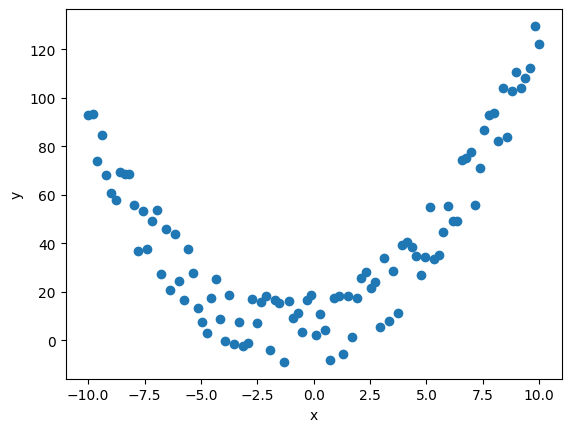

In [ ]:
X = torch.linspace(-10,10,100).reshape(-1,1)
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-15,15,(100,1),dtype=torch.float)
print(e.sum())
y = X**2 + 2*X +5 + e
print(y.shape)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

## Model classes
PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a single <tt>linear</tt> layer.

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.Tensor(torch.randn(1)).clone(),requires_grad=True)
        self.b = nn.Parameter(torch.Tensor(torch.randn(1)),requires_grad=True)
        self.c = nn.Parameter(torch.Tensor(torch.randn(1)),requires_grad=True)

    def forward(self, x):
        out=self.a*x**2+self.b*x+self.c
        return out

In [ ]:
torch.manual_seed(59)
model = Model()
print(model.a.item(),model.b.item(),model.c.item())
print(model)

-0.7782180309295654 0.4032409191131592 -0.8726842999458313
Model()


As models become more complex, it may be better to iterate over all the model parameters:

In [ ]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

a 	 -0.7782180309295654
b 	 0.4032409191131592
c 	 -0.8726842999458313


## Plot the initial model
We can plot the untrained model against our dataset to get an idea of our starting point.

Text(0.5, 0, 'x')

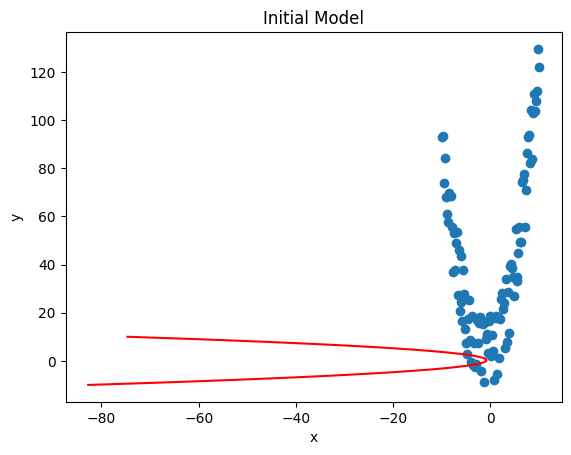

In [ ]:

with torch.no_grad():
  Y=model(X)

plt.scatter(X.numpy(), y.numpy())
plt.plot(Y.detach().numpy(),X.detach().numpy(),'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x')

## Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2\end{split}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [ ]:
criterion = nn.MSELoss()

## Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

## Train the model


<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=white>epochs = 600</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=white>losses = []</font></tt><br>
<tt><font color=white>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [ ]:
epochs = 600
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    if i% 10 ==0:
      print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: a={model.a.item()},b={model.b.item()},c={model.c.item()} ')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 10  loss: 184.50753784  weight: a=1.100180983543396,b=0.49655261635780334,c=-0.8366842865943909 
epoch: 20  loss: 174.59780884  weight: a=1.1148896217346191,b=0.5937272906303406,c=-0.8305570483207703 
epoch: 30  loss: 166.34996033  weight: a=1.1148614883422852,b=0.6844913363456726,c=-0.8246759176254272 
epoch: 40  loss: 159.15008545  weight: a=1.1147657632827759,b=0.7692678570747375,c=-0.8188011050224304 
epoch: 50  loss: 152.86445618  weight: a=1.1146697998046875,b=0.8484517335891724,c=-0.8129314184188843 
epoch: 60  loss: 147.37646484  weight: a=1.1145740747451782,b=0.9224119782447815,c=-0.8070669770240784 
epoch: 70  loss: 142.58432007  weight: a=1.1144782304763794,b=0.9914929866790771,c=-0.8012077808380127 
epoch: 80  loss: 138.39929199  weight: a=1.1143826246261597,b=1.0560168027877808,c=-0.7953538298606873 
epoch: 90  loss: 134.74388123  weight: a=1.11428701877594,b=1.1162840127944946,c=-0.7895050048828125 
epoch: 100  loss: 131.55058289  weight: a=1.1141915321350098,b=1.1

## Plot the result
Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

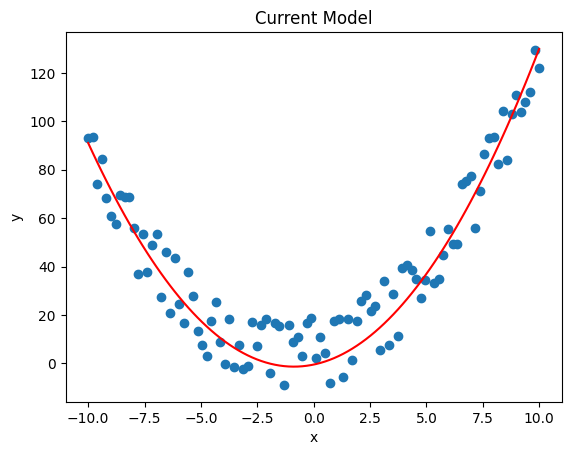

In [ ]:
with torch.no_grad():
  Y=model(X)

plt.scatter(X.numpy(), y.numpy())
plt.plot(X,Y,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

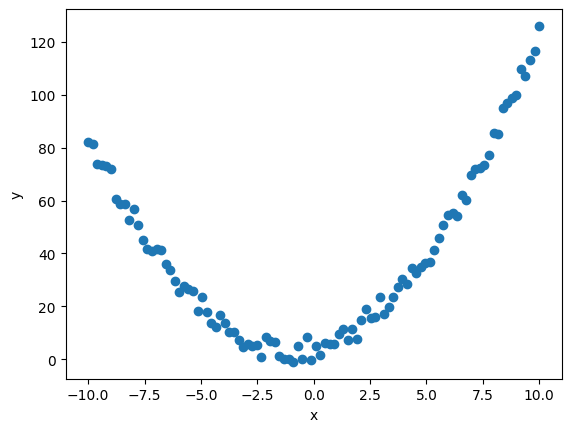

In [ ]:
e = torch.randint(-5,5,(100,1),dtype=torch.float)
y = X**2 + 2*X +5 + e
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

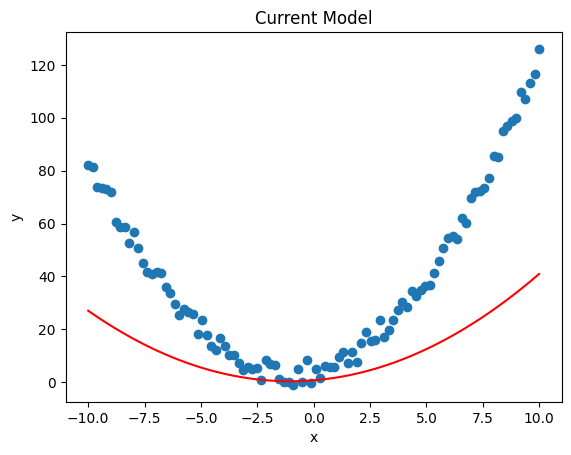

In [ ]:
model = Model()
with torch.no_grad():
  Y=model(X)

plt.scatter(X.numpy(), y.numpy())
plt.plot(X,Y,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)
criterion = nn.MSELoss()

In [ ]:
epochs = 600
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    if i% 10 ==0:
      print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: a={model.a.detach()},b={model.b.detach()},c={model.c.detach()} ')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



epoch: 10  loss: 59.27014542  weight: a=tensor([1.0494]),b=tensor([0.7693]),c=tensor([0.7704]) 
epoch: 20  loss: 53.17637634  weight: a=tensor([1.0550]),b=tensor([0.8470]),c=tensor([0.7735]) 
epoch: 30  loss: 47.91746902  weight: a=tensor([1.0550]),b=tensor([0.9195]),c=tensor([0.7765]) 
epoch: 40  loss: 43.32836914  weight: a=tensor([1.0549]),b=tensor([0.9873]),c=tensor([0.7795]) 
epoch: 50  loss: 39.32363892  weight: a=tensor([1.0549]),b=tensor([1.0506]),c=tensor([0.7826]) 
epoch: 60  loss: 35.82870102  weight: a=tensor([1.0548]),b=tensor([1.1098]),c=tensor([0.7856]) 
epoch: 70  loss: 32.77852631  weight: a=tensor([1.0548]),b=tensor([1.1650]),c=tensor([0.7886]) 
epoch: 80  loss: 30.11634827  weight: a=tensor([1.0547]),b=tensor([1.2166]),c=tensor([0.7916]) 
epoch: 90  loss: 27.79269600  weight: a=tensor([1.0547]),b=tensor([1.2648]),c=tensor([0.7946]) 
epoch: 100  loss: 25.76436615  weight: a=tensor([1.0546]),b=tensor([1.3098]),c=tensor([0.7976]) 
epoch: 110  loss: 23.99367714  weight: 

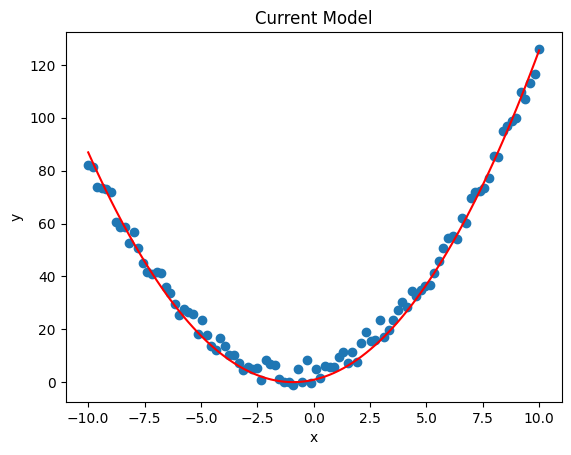

In [ ]:
with torch.no_grad():
  Y=model(X)

plt.scatter(X.numpy(), y.numpy())
plt.plot(X,Y,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');


### MNIST Classification

In [ ]:
import pickle, gzip, math, torch, matplotlib as mpl
import time
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import tensor
from torchvision import datasets, transforms
from torch import nn
import torch.optim as optim


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
train_dataset = datasets.MNIST('data', train=True, download=True,)
test_dataset = datasets.MNIST('data', train=False, download=True,)

In [ ]:
def clean_dataset(dataset):
  t=transforms.ToTensor()
  img_list=[]
  lbl_list=[]
  for item in dataset:
    img=t(item[0]).reshape(-1)
    label=item[1]
    img_list.append(img)
    lbl_list.append(label)
  return torch.stack(img_list, dim=0),torch.tensor(lbl_list)


In [ ]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
train_dataset[1]

(<PIL.Image.Image image mode=L size=28x28>, 0)

In [ ]:
train_X,train_y=clean_dataset(train_dataset)
test_X,test_y=clean_dataset(test_dataset)

In [ ]:
print(train_X.shape,train_y.shape)
print(test_X.shape,test_y.shape)

torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])


tensor(7)


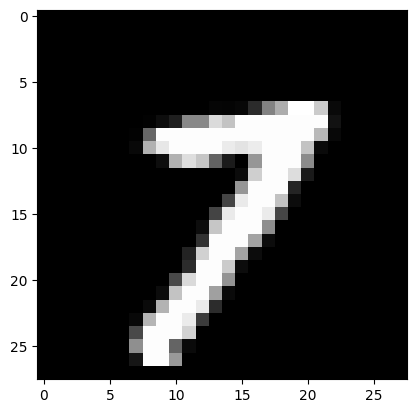

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
print(train_y[40000])
_ = plt.imshow(train_X[40000].view(28,28), cmap='gray')

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = self.fc2(x)
        return x

In [ ]:
model_linear = Net()
opt = optim.SGD(model_linear.parameters(), lr=0.01)
loss_func = F.cross_entropy
epochs = 10
batch_size = 8
num_rows= train_X.shape[0]
losses=[]
for epoch in range(epochs):
    print("starting ")
    running_loss = 0.0
    for i in range((num_rows-1)//batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = train_X[start_i:end_i]
        yb = train_y[start_i:end_i]
        pred = model_linear(xb)
        loss = loss_func(pred, yb)
        running_loss += loss.item()
        loss.backward()
        opt.step() # Updating weights.
        opt.zero_grad()

    print(f'epoch: {epoch:2}  loss: {running_loss/(num_rows/batch_size):10.8f}')

starting 
epoch:  0  loss: 0.57197679
starting 
epoch:  1  loss: 0.30536814
starting 
epoch:  2  loss: 0.25641196
starting 
epoch:  3  loss: 0.22522467
starting 
epoch:  4  loss: 0.20294316
starting 
epoch:  5  loss: 0.19136475
starting 
epoch:  6  loss: 0.17476559
starting 
epoch:  7  loss: 0.16829349
starting 
epoch:  8  loss: 0.15821116
starting 
epoch:  9  loss: 0.15166906


In [ ]:
def accuracy(out, y_batch):
    return (torch.argmax(out, dim=1)==y_batch).float().mean()

In [ ]:
with torch.no_grad():
  model_linear.eval()
  test_acc=accuracy(model_linear(test_X), test_y)
  model_linear.train()

In [ ]:
test_acc

tensor(0.9674)

label:5,pred:5


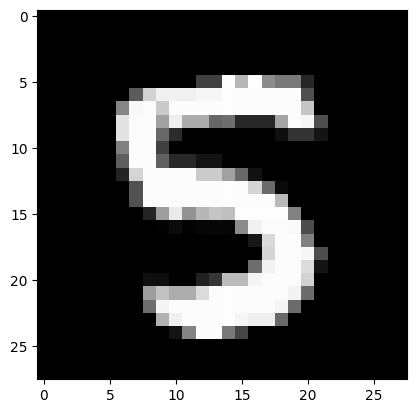

In [ ]:
test_idx=120

_ = plt.imshow(test_X[test_idx].view(28,28), cmap='gray')
with torch.no_grad():
  model_linear.eval()
  pred=model_linear(test_X[test_idx])
  model_linear.train()
print(f"label:{test_y[test_idx]},pred:{torch.argmax(pred)}")

tensor(2)
